# Homework 2 - Esercizio 2 
## Pierluigi Compagnone

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

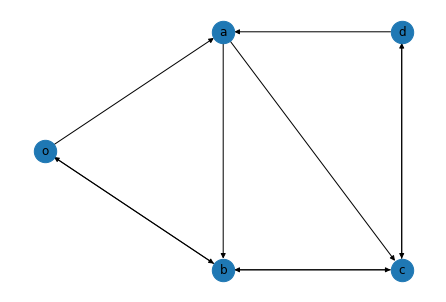

In [2]:
G = nx.DiGraph()
G.add_edges_from([("o","a"),("o","b"),("a","b"),("a","c"),("b","o"),("b","c"),("c","b"),("c","d"),("d","a"),("d","c")])

pos = {"o":[-2,0], "a":[0,1], "b":[0,-1], "c":[2,-1], "d":[2,1]}

#plotting G

nx.draw(G, pos, with_labels=True, node_size = 500)

In [3]:
Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)

#calculate matrix Q

Q = Lambda/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

#calculate the normalized transition matrix

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

#compute pi_bar

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar," \n")

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]  



**(a) Particle perspective:**
- If 100 particles all start in node a, what is the average time for a particle to return to node a?
    
- How does this compare to the answer in Problem 1, why?

**First approach**

In [4]:
#set number of particles, origin and destination.

n_particles = 100
origin = 1
destination = 1

n_iterations = 1000

Q_cum = np.cumsum(Q, axis=1)

#store the return times

return_times = []

for it in range(n_iterations):
    
    #reinitialize at each iteration
    
    #keep trace of the states visited by all particles
    
    pos = np.zeros((n_particles,1), dtype = int)
    pos[:] = origin
    
    #store the times spent before transitions
    
    transition_times = [0]
    
    #calculate the time at which first transition happens
    
    t_next = -np.log(np.random.rand())/(n_particles*w_star)
    
    #select a specific particle
    
    follow_part = np.random.randint(n_particles)
    
    i = 1
    
    while True:
        
        #choose the particle to moove
        
        p = np.random.randint(n_particles)
       
        #take the position of the particle at previous step and calculate where to move according to probabilities in Q
        
        old_node = pos[p,i-1]
        new_node = np.argwhere(Q_cum[old_node] > np.random.rand())[0]

        #build the new positions vector where only the position of a particle is changed accordingly to previous computation
        
        new_pos = pos[:,i-1].copy()
        new_pos[p] = new_node
        new_pos = np.reshape(new_pos,(n_particles,1))
        
        #concatenate new position to vector pos
        
        pos = np.concatenate((pos, new_pos), axis = 1)
        
        #store the time instant of the current transition
        
        transition_times.append(transition_times[i-1] + t_next)
        
        # compute the waiting time to the next transition
        
        t_next = -np.log(np.random.rand())/(n_particles*w_star)
        
        #if the new node coincides with the destination stop the cycle and store the return time
        
        if new_node == destination and p == follow_part:
            return_times.append(transition_times[i])
            break
        
        i += 1
        
            
print("the average return time for a selected particle to come back to node 'a' is: ", np.mean(return_times), "\n")

the average return time for a selected particle to come back to node 'a' is:  6.708500785928728 



**Second approach**

In [5]:
#set number of particles, origin and destination.

n_particles = 100
origin = 1
destination = 1

n_iterations = 10000

Q_cum = np.cumsum(Q, axis=1)

#store the return times

return_times = []

for it in range(n_iterations):
    
    #reinitialize at each iteration
    
    #keep trace of the states visited by all particles
    
    pos = np.zeros((n_particles,1), dtype = int)
    pos[:] = origin
    
    #store the times spent before transitions
    
    transition_times = [0]
    
    #calculate the time at which first transition happens
    
    t_next = -np.log(np.random.rand())/(n_particles*w_star)
    
    i = 1
    
    while True:
        
        #choose the particle to moove
        
        p = np.random.randint(n_particles)
       
        #take the position of the particle at previous step and calculate where to move according to probabilities in Q
        
        old_node = pos[p,i-1]
        new_node = np.argwhere(Q_cum[old_node] > np.random.rand())[0]

        #build the new positions vector where only the position of a particle is changed accordingly to previous computation
        
        new_pos = pos[:,i-1].copy()
        new_pos[p] = new_node
        new_pos = np.reshape(new_pos,(n_particles,1))
        
        #concatenate new position to vector pos
        
        pos = np.concatenate((pos, new_pos), axis = 1)
        
        #store the time instant of the current transition
        
        transition_times.append(transition_times[i-1] + t_next)
        
        # compute the waiting time to the next transition
        
        t_next = -np.log(np.random.rand())/(n_particles*w_star)
        
        #if the new node coincides with the destination stop the cycle and store the return time
        
        if new_node == destination:
            return_times.append(transition_times[i])
            break
        
        i += 1
        
            
print("the average return time until at least a particle come back to node 'a' is: ", np.mean(return_times), "\n")

the average return time until at least a particle come back to node 'a' is:  0.6751020876595921 



**Run the two following cells to verify the similiraty with sqrt function**

Comparison between the square root of the number of particles and the ratio between the average return time with one particle on the average return time with different number of particles.

In [6]:
#set origin and destination.

origin = 1
destination = 1

#set the number of iterations

n_iterations = 10000

#set different numbers of particles

parti = [1,4,9,16,25,36,49,64,81,100]

mean_times= []

for n_particles in parti:
    
    # Loop to compute the mean
    
    return_times = []
    
    for it in range(n_iterations):
    
        #reinitialize at each iteration

        #keep trace of the states visited by all particles

        pos = np.zeros((n_particles,1), dtype = int)
        pos[:] = origin

        #store the times spent before transitions

        transition_times = [0]

        #calculate the time at which first transition happens

        t_next = -np.log(np.random.rand())/(n_particles*w_star)

        i = 1

        while True:

            #choose the particle to moove

            p = np.random.randint(n_particles)

            #take the position of the particle at previous step and calculate where to move according to probabilities in Q

            old_node = pos[p,i-1]
            new_node = np.argwhere(Q_cum[old_node] > np.random.rand())[0]

            #build the new positions vector where only the position of a particle is changed accordingly to previous computation

            new_pos = pos[:,i-1].copy()
            new_pos[p] = new_node
            new_pos = np.reshape(new_pos,(n_particles,1))

            #concatenate new position to vector pos

            pos = np.concatenate((pos, new_pos), axis = 1)

            #store the time instant of the current transition

            transition_times.append(transition_times[i-1] + t_next)

            # compute the waiting time to the next transition

            t_next = -np.log(np.random.rand())/(n_particles*w_star)

            #if the new node coincides with the destination stop the cycle and store the return time

            if new_node == destination:
                return_times.append(transition_times[i])
                break

            i += 1
            
    mean_times.append( np.mean(return_times) )

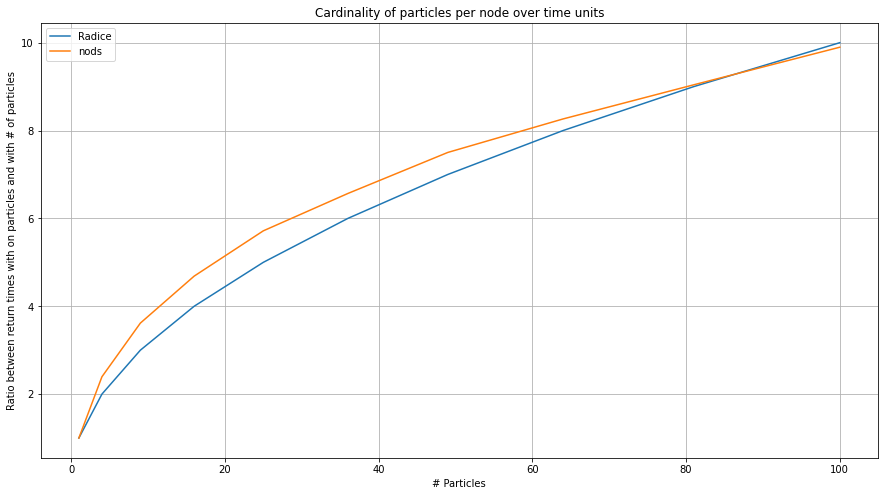

In [7]:
parti = [1,4,9,16,25,36,49,64,81,100]
plt.figure(figsize=[15,8])

plt.plot(parti, np.sqrt(parti))
plt.plot(parti, mean_times[0]/mean_times) 
    
plt.grid()
plt.legend(["Radice","nods"])
plt.title("Cardinality of particles per node over time units")
plt.xlabel("# Particles")
plt.ylabel("Ratio between return times with on particles and with # of particles")
#plt.savefig('SQRT.eps', format='eps')
plt.show()

**(b) Node perspective:**
- If 100 particles start in node o, and the system is simulated for 60 time units, what is the average number of particles in the different nodes at the end of the simulation?
- Illustrate the simulation above with a plot showing the number of particles in each node during the simulation time.
- Compare the simulation result in the first point above with the stationary distribution of the continuous-time random walk followed by the single particles.

In [8]:
#set number of particles, origin and time units

n_particles = 100
origin = 0
time_units = 60

n_iterations = 100

Q_cum = np.cumsum(Q, axis=1)

#store the final distribution of particles over nodes for each iteration

final_distributions = np.zeros((5,n_iterations))

for it in range(n_iterations):
    
    #reinitialize at each iteration
    
    #keep trace of the number of particles in nodes
    
    nodes = np.zeros((5,1), dtype = int)
    nodes[origin] = n_particles

    #store the times spent before transitions
    
    transition_times = [0]
    
    #calculate the time at which first transition happens
    
    t_next = -np.log(np.random.rand())/(n_particles*w_star)
    
    i = 1
    
    while transition_times[i-1]<time_units:
        
        #extract the node leaved by a particle and then the arriving node according to probability in Q
        
        starting_node = np.argwhere(np.cumsum(nodes[:,i-1]) > np.random.rand()*100)[0]
        arriving_node = np.argwhere(Q_cum[int(starting_node)] > np.random.rand())[0]
        
        #calculate the cardinality over nodes
    
        new_nodes = nodes[:,i-1].copy()
        new_nodes[starting_node] = new_nodes[starting_node]-1
        new_nodes[arriving_node] = new_nodes[arriving_node]+1
        new_nodes = np.reshape(new_nodes,(5,1))
        
        #concatenate new nodes distribution to vector nodes
        
        nodes = np.concatenate((nodes, new_nodes), axis = 1)
        
        #store the time instant of the current transition
        
        transition_times.append(transition_times[i-1] + t_next)
        
        # compute the waiting time to the next transition
        
        t_next = -np.log(np.random.rand())/(n_particles*w_star)
        
        i+=1
    
    final_distributions[:,it] = nodes[:,-1]
        
print("the average node cardinality after 60 time units is: ", np.mean(final_distributions,axis=1),"\n")

the average node cardinality after 60 time units is:  [18.18 14.8  22.53 22.14 22.35] 



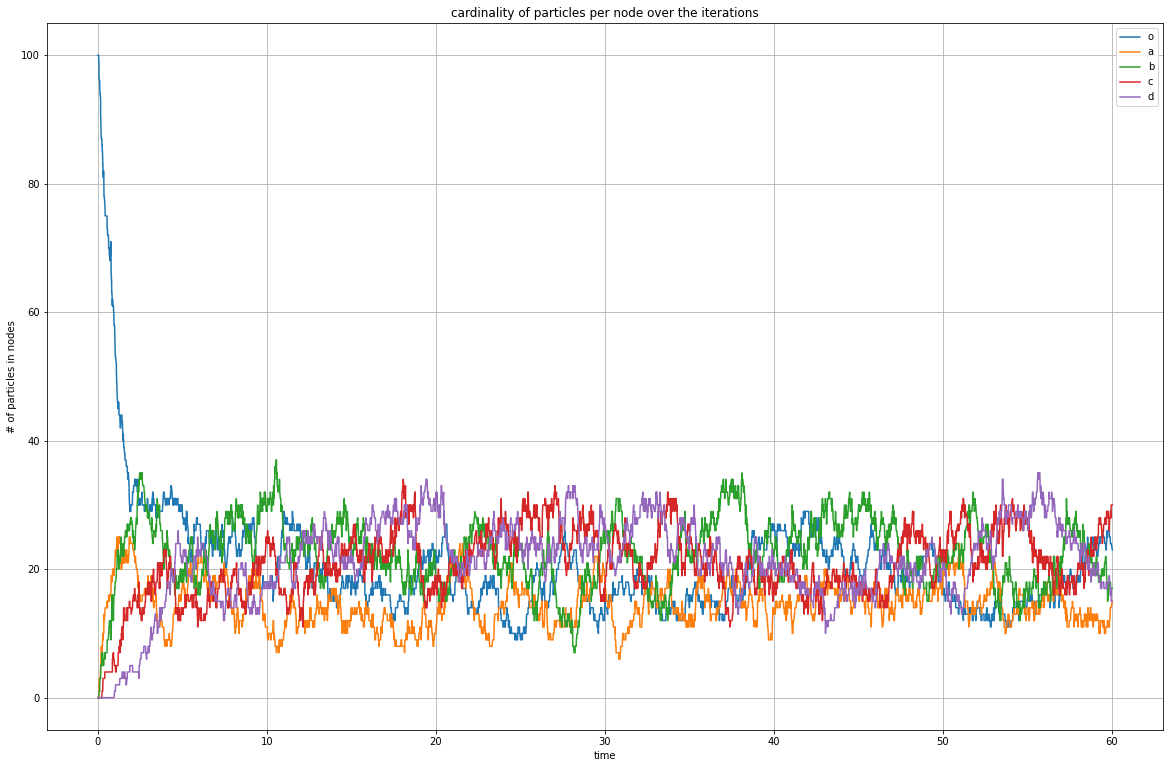

In [9]:
#Plot the number of particles in each node during the simulation time.

plt.figure(figsize=[20,13])
labels = ["o", "a", "b", "c", "d"]


for i in range(nodes.shape[0]):
    plt.plot(transition_times, nodes[i])

plt.grid()
plt.legend(labels)
plt.title("cardinality of particles per node over the iterations")
plt.xlabel("time")
plt.ylabel("# of particles in nodes")
plt.show()

In [10]:
#compute stationary distribution of the continuous-time random walk followed by the single particles.

print("The stationary distribution of the continuous-time random walk is: ", pi_bar)

The stationary distribution of the continuous-time random walk is:  [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]
